Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [6]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [11]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [8]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [10]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [14]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [12]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [15]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [10.35557026  2.59692389  1.51262735  3.10201726], error 3453.9350692984235
Iter: 500, weights: [56.49717514  6.30232407 -0.3542726   6.56981041], error 24.90462772483224
Iter: 1000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646691345
Iter: 1500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688844
Iter: 2000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Iter: 2500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Iter: 3000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Iter: 3500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Iter: 4000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Iter: 4500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Final MSE: 24.904627646688823


array([56.49717514,  6.30234588, -0.35437787,  6.5698973 ])

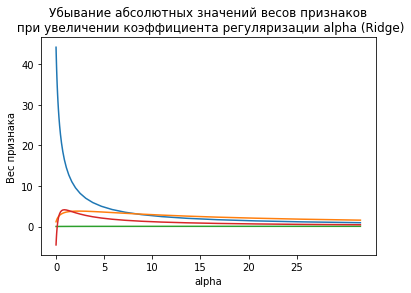

In [27]:
from sklearn.linear_model import Ridge

n = 50

train_amount = 5
train_X = X[:train_amount]
train_y = y[:train_amount]
test_X = X[train_amount:]
test_y = y[train_amount:]


coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 1.5, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 30, 5))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [28]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = W / np.absolute(W)# градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [29]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [10.65918244  2.53637943  1.19024578  1.61717325], error 3516.586034927054
Iter: 500, weights: [56.          5.91392697  0.18247981  6.02384083], error 25.49376567065952
Iter: 1000, weights: [5.60000000e+01 5.89600778e+00 2.15601520e-02 6.00148770e+00], error 25.50051466786937
Iter: 1500, weights: [56.          5.87761598  0.06799677  5.98177666], error 25.488888590103567
Iter: 2000, weights: [56.          5.91392766  0.18247649  6.02384357], error 25.493765056953677
Iter: 2500, weights: [5.60000000e+01 5.89600778e+00 2.15601518e-02 6.00148770e+00], error 25.500514667847575
Iter: 3000, weights: [56.          5.87761598  0.06799677  5.98177666], error 25.48888859010353
Iter: 3500, weights: [56.          5.91392766  0.18247649  6.02384357], error 25.493765056953677
Iter: 4000, weights: [5.60000000e+01 5.89600778e+00 2.15601518e-02 6.00148770e+00], error 25.500514667847575
Iter: 4500, weights: [56.          5.87761598  0.06799677  5.98177666], error 25.48888859010353
Fin

array([ 5.60000000e+01,  5.90971183e+00, -8.13670119e-03,  6.01829292e+00])

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
Ответ: думаю, что нет, потому что стандартизацию можно применять к категориальным признакам,а нормализацию нет

*Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [2]:
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=4, n_informative=4, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, Y, coef)

array([[ 12.49255786,   0.07072125,   1.20681107,  -0.46495831],
       [-11.08351667,  -0.97133221,  -0.5900906 ,   0.99015268],
       [  0.02887411,  -0.53674387,  -2.9967616 ,  -1.23253914],
       ...,
       [ -2.01348046,  -1.45522308,  -0.84259068,  -0.05440318],
       [ -2.78885368,  -2.12077334,  -0.67584851,  -1.32161204],
       [  4.79509962,   1.1074164 ,   1.59185865,  -1.9293907 ]])

array([ 1.17303671e+02, -1.19458934e+02, -2.97941285e+02, -4.61460192e+01,
       -6.74986602e+00, -4.95563993e+01, -1.61930403e+02, -1.28089758e+01,
        2.01600024e+00,  4.18600438e+01, -1.08152111e+02, -2.46230431e+02,
        1.91307900e+02, -2.47847687e+01, -1.11779739e+01,  1.69589303e+02,
       -1.54139865e+02,  8.91594235e+00,  1.73791155e+01,  1.25367501e+02,
        1.22885018e+02, -7.37502697e+01, -2.02371563e+02, -1.39579840e+02,
       -6.92034453e+01,  1.54696893e+01, -1.34084153e+01,  2.44912164e+02,
       -4.50920649e+01, -3.09862881e+01, -5.14975022e+01,  9.10708296e+01,
        7.32052210e+01,  2.94262809e+01,  7.77651764e+01, -8.69798990e+01,
        2.44702676e+01,  7.76803526e+01, -1.49800519e+02,  1.96410179e+01,
       -8.66106283e+01,  6.25843067e+01,  1.29812084e+02, -5.87042533e+01,
       -2.10168448e+01, -2.46566935e+02,  3.02089363e+02,  4.41858553e+01,
        9.71908438e+01,  5.07599038e+01, -2.91259055e+01,  4.35461014e+01,
        4.53194194e+01,  

array([34.97278679, 75.03686389, 71.61510299, 34.65254101])

In [4]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)


array([ 0.48585266,  0.01836246, -0.06231375, -0.09252774])

array([9.79717685, 1.04749671, 1.00243273, 1.00504272])

In [5]:
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [6]:
X

array([[ 1.22552705,  0.04998468,  1.26604488, -0.37056193],
       [-1.18088808, -0.94481888, -0.52649602,  1.07724816],
       [-0.0466439 , -0.52993611, -2.92732646, -1.13429149],
       ...,
       [-0.25510748, -1.40676866, -0.77838333,  0.03793327],
       [-0.33425   , -2.04214083, -0.61204581, -1.22291747],
       [ 0.43984579,  1.03967291,  1.65015802, -1.82764665]])

In [7]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([-1.11577414e-17, -8.21565038e-18, -3.55271368e-17,  1.55431223e-17])

array([1., 1., 1., 1.])

In [8]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Градиентный спуск

In [33]:
# возьмем нулевые начальные веса
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []
# список итераций

iter_num_grad = []
# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, Y)
    iter_num_grad.append(iter_num)
    w_list.append(new_w.copy())
    errors.append(error)
    
    print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    
    iter_num += 1
    
    w = new_w
    
w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

Iter 0: error - 13147.727813401936, weights: [0.76430112 1.54597705 1.37779491 0.73897304]
Iter 1: error - 12632.407105117294, weights: [1.51179373 3.06144658 2.72921535 1.46235517]
Iter 2: error - 12137.397066320566, weights: [2.24284488 4.54701269 4.05476535 2.17047516]
Iter 3: error - 11661.895538501954, weights: [2.95781365 6.0032675  5.35493934 2.86365489]
Iter 4: error - 11205.132109501796, weights: [3.65705134 7.43079135 6.63022232 3.54220943]
Iter 5: error - 10766.366854496604, weights: [4.3409016  8.83015305 7.88109004 4.20644721]
Iter 6: error - 10344.889127019833, weights: [ 5.00970063 10.20191011  9.10800917  4.85667017]
Iter 7: error - 9940.016398024982, weights: [ 5.66377732 11.54660896 10.31143748  5.49317388]
Iter 8: error - 9551.093141078014, weights: [ 6.30345342 12.86478517 11.491824    6.11624767]
Iter 9: error - 9177.48976184213, weights: [ 6.92904369 14.1569637  12.6496092   6.7261748 ]
Iter 10: error - 8818.601570091678, weights: [ 7.54085604 15.42365904 13.78522

Iter 256: error - 47.084598871514835, weights: [34.36596045 78.10782745 71.38545809 34.86647439]
Iter 257: error - 47.06525299646334, weights: [34.36803507 78.11744393 71.39490266 34.86953795]
Iter 258: error - 47.046655208806314, weights: [34.37005993 78.12687359 71.40416548 34.87253677]
Iter 259: error - 47.02877653590262, weights: [34.3720362  78.13612008 71.41325004 34.87547222]
Iter 260: error - 47.01158912899627, weights: [34.37396499 78.14518695 71.42215976 34.87834564]
Iter 261: error - 46.99506621954623, weights: [34.37584743 78.15407772 71.43089802 34.88115834]
Iter 262: error - 46.97918207725712, weights: [34.37768459 78.16279581 71.43946811 34.8839116 ]
Iter 263: error - 46.963911969742625, weights: [34.37947752 78.17134457 71.44787325 34.88660668]
Iter 264: error - 46.94923212375875, weights: [34.38122727 78.17972732 71.45611664 34.88924481]
Iter 265: error - 46.93511968794616, weights: [34.38293484 78.18794727 71.46420137 34.89182719]
Iter 266: error - 46.92155269702146, 

Iter 542: error - 46.58356903493113, weights: [34.44896811 78.60213064 71.87411112 35.01114731]
Iter 543: error - 46.58356876861144, weights: [34.44896679 78.60216709 71.87414734 35.01115418]
Iter 544: error - 46.5835685124502, weights: [34.44896546 78.60220284 71.87418285 35.0111609 ]
Iter 545: error - 46.58356826605976, weights: [34.44896413 78.6022379  71.87421769 35.01116749]
Iter 546: error - 46.58356802906698, weights: [34.4489628  78.60227229 71.87425185 35.01117393]
Iter 547: error - 46.5835678011132, weights: [34.44896146 78.60230601 71.87428536 35.01118024]
Iter 548: error - 46.583567581853394, weights: [34.44896013 78.6023391  71.87431821 35.01118641]
Iter 549: error - 46.58356737095541, weights: [34.44895881 78.60237154 71.87435044 35.01119246]
Iter 550: error - 46.583567168100394, weights: [34.44895748 78.60240336 71.87438204 35.01119838]
Iter 551: error - 46.583566972981274, weights: [34.44895615 78.60243458 71.87441304 35.01120417]
Iter 552: error - 46.58356678530283, we

Iter 719: error - 46.58356205456503, weights: [34.44884102 78.60396917 71.87592995 35.01146671]
Iter 720: error - 46.58356205428706, weights: [34.44884083 78.60397036 71.87593111 35.01146687]
Iter 721: error - 46.58356205401964, weights: [34.44884065 78.60397153 71.87593224 35.01146703]
Iter 722: error - 46.58356205376244, weights: [34.44884047 78.60397267 71.87593335 35.01146719]
Iter 723: error - 46.58356205351486, weights: [34.44884029 78.60397379 71.87593444 35.01146734]
Iter 724: error - 46.58356205327675, weights: [34.44884011 78.60397489 71.87593551 35.01146749]
Iter 725: error - 46.5835620530476, weights: [34.44883994 78.60397597 71.87593656 35.01146763]
Iter 726: error - 46.58356205282724, weights: [34.44883977 78.60397703 71.87593759 35.01146778]
Iter 727: error - 46.58356205261522, weights: [34.4488396  78.60397806 71.8759386  35.01146792]
Iter 728: error - 46.58356205241124, weights: [34.44883943 78.60397908 71.87593958 35.01146805]
Iter 729: error - 46.583562052214965, wei

Стохастический градиентный спуск

In [39]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_st = []

# список итераций

iter_num_st_grad = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num_st = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num_st < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X, new_w, Y)
    
    iter_num_st_grad.append(iter_num_st)
    
    w_list.append(new_w.copy())
    
    errors_st.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num_st}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num_st += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num_st}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

Iter 1000: error - 49.45036281608915, weights: [34.52461944 77.37234786 71.46743576 36.11913443]
В случае использования стохастического градиентного спуска ошибка составляет 46.5836
Wall time: 284 ms


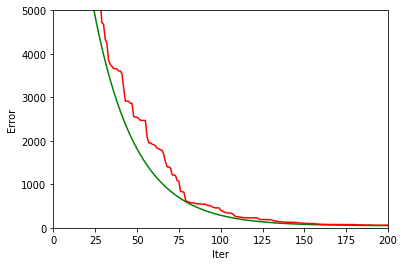

In [43]:
plt.xlabel('Iter')
plt.ylabel('Error')
plt.ylim(0, 5000)
plt.xlim(0, 200, 5)

plt.plot(iter_num_grad, errors, color='g')

plt.plot(iter_num_st_grad, errors_st, color='r');

Если присмотреться, то градиентный спуск сошёлся немного раньше, но в целом одинаково